# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**AI-generated Jupyter notebook**  
**Warning:** This notebook was generated by an AI assistant and has **not been fully verified**. Please review all code and results with care. The code is for exploratory purposes only—use at your own discretion and always refer to the original data and documentation for critical analyses.

---

## Overview

This notebook explores [`Dandiset 001366`](https://dandiarchive.org/dandiset/001366/0.250324.1603):  
**"Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification"**

- **Description:** Movies of a pial vessel of mice used in the experiments.
- **Contributors:** Zhao, Yue; Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken; Kelley, Douglas H.; Boster, Kimberly A. S.; National Institute of Health; United States Army
- **License:** CC-BY-4.0
- **Citation:**  
  Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; et al. (2025) _Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification_ (Version 0.250324.1603) [Data set]. DANDI Archive. [doi:10.48324/dandi.001366/0.250324.1603](https://doi.org/10.48324/dandi.001366/0.250324.1603)

### Dandiset Link:
[https://dandiarchive.org/dandiset/001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

---

## What this notebook covers

This notebook will:
- Guide you through accessing Dandiset 001366 and summarizing its contents.
- Demonstrate how to load NWB files using the DANDI and PyNWB APIs.
- Explore and visualize a representative movie dataset.
- Show how to extract key metadata and explain data structure.
- Provide best-practice code for obtaining information, cautioning on interpretation.
- Suggest next steps for deeper analyses.

---

## Required packages

The following Python packages are required and are **assumed to be already installed**:

- `dandi` (for DANDI API access)
- `pynwb` (for loading NWB files)
- `h5py` (for handling NWB file format)
- `remfile` (for efficient remote streaming)
- `matplotlib` (for plotting)
- `numpy`

> **Do not include pip install commands in this notebook.**

---

## 1. Load and Inspect the Dandiset using DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and retrieve Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['identifier']}")
print(f"Description: {metadata.get('description', 'No description')}")
print(f"Contributors: {', '.join(metadata.get('contributor', []))}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
assets_list = list(islice(assets, 5))
print("\nFirst 5 assets:")
for asset in assets_list:
    print(f"- {asset.path} (ID: {asset.identifier})")
if not assets_list:
    print("No assets found.")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: DANDI:001366
Description: movies of a pial vessel of mice used in the experiments.


TypeError: sequence item 0: expected str instance, dict found

## 2. Explore the Available NWB Files

For demonstration, we'll focus on a single NWB file from this Dandiset (the smaller file for faster loading):

**sub-F15/sub-F15_ses-F15BC-19102023_image.nwb**  
_Asset ID: 71fa07fc-4309-4013-8edd-13213a86a67d_  
Size: ≈ 408 MB

URL for this file:

```
https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/
```

[Explore this file in NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=draft)

Let's load this file and examine its metadata as well as its main dataset.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print top-level session metadata
print("Session description:", nwb.session_description)
print("NWB identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Experimenter(s):", nwb.experimenter)
print("Experiment description:", getattr(nwb, "experiment_description", None))
print("Institution:", getattr(nwb, "institution", None))
print("Subject ID:", getattr(nwb.subject, "subject_id", None))
print("Subject info:")
print(" - Sex:", getattr(nwb.subject, "sex", None))
print(" - Age:", getattr(nwb.subject, "age", None))
print(" - Strain:", getattr(nwb.subject, "strain", None))
print(" - Species:", getattr(nwb.subject, "species", None))

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
NWB identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
Session start time: 2023-10-19 02:00:00-04:00
Experimenter(s): ('Ghanizada, Hashmat ',)
Experiment description: Vessel diameter and pulsatility measurement.
Institution: University of Copenhagen
Subject ID: F15
Subject info:
 - Sex: F
 - Age: P9W/P16W
 - Strain: C57BL/6J
 - Species: Mus musculus


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Summary of NWB File Structure

The main acquisition in this NWB file is a movie (grayscale, 16-bit), stored as an **ImageSeries** under `acquisition["Movies"]`.

Key properties:

- **Shape:** (9553, 214, 132) &mdash; 9553 frames, each frame is 214x132 pixels
- **Data type:** uint16
- **Sampling rate:** 54.47 Hz
- **Description:** 16-bit grayscale movie of a pial vessel

Displayed below is a summary as a Markdown table for reference.

| Key property      | Value                                       |
|-------------------|---------------------------------------------|
| Data shape        | (9553, 214, 132)                            |
| Data type         | uint16                                      |
| Sampling rate     | 54.47 Hz                                    |
| Start time        | 0.0 seconds                                 |
| Description       | 16-bit grayscale movie of a pial vessel      |
| Conversion        | 1.0                                         |
| Offset            | 0.0                                         |
| Unit              | n.a.                                        |
| Resolution        | -1.0                                        |

Access the asset directly in [NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=draft) for interactive exploration.

---

### How to Inspect the File Structure Programmatically
The following code cell prints the acquisition keys and shows the structure of the main movie dataset.

In [3]:
print("Available acquisitions:")
print(list(nwb.acquisition.keys()))
Movies = nwb.acquisition["Movies"]
print(type(Movies))
print("Movies description:", Movies.description)
print("Movies data shape:", Movies.data.shape)
print("Movies data type:", Movies.data.dtype)
print("First frame shape:", Movies.data[0, :, :].shape)

Available acquisitions:
['Movies']
<class 'pynwb.image.ImageSeries'>
Movies description: 16-bit grayscale movie of a pial vessel
Movies data shape: (9553, 214, 132)
Movies data type: uint16


First frame shape: (214, 132)


## 3. Visualize Movie Data

Let's look at a few example frames from the movie. Because these data are streamed remotely, we'll fetch and display only a small subset (a few frames, and some pixel regions if necessary).

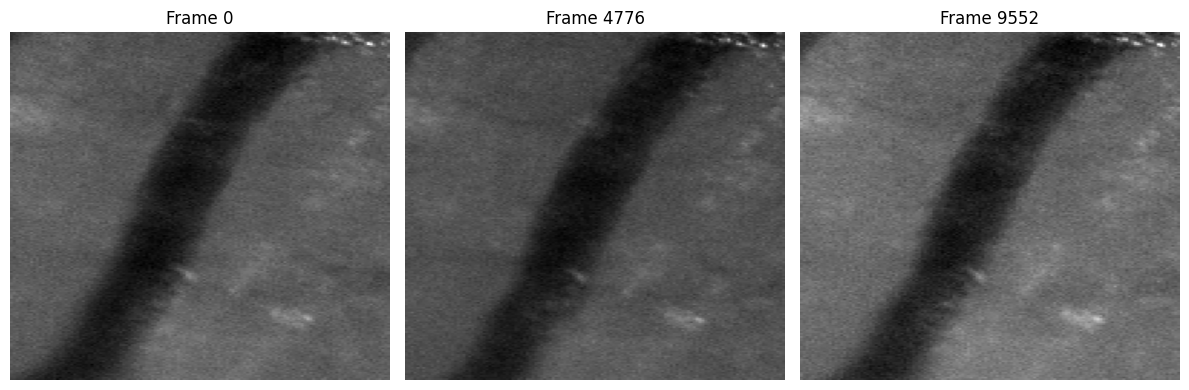

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Utility: show a grid of frames
def show_movie_frames(movies_data, indices, title_prefix=""):
    n = len(indices)
    fig, axs = plt.subplots(1, n, figsize=(4 * n, 4))
    if n == 1:
        axs = [axs]
    for ax, idx in zip(axs, indices):
        ax.imshow(movies_data[idx, :, :], cmap="gray", aspect="auto")
        ax.set_title(f"{title_prefix}Frame {idx}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Note: Accessing a single frame doesn't load the whole stack.
num_frames = Movies.data.shape[0]
frame_indices = [0, num_frames // 2, num_frames - 1]
show_movie_frames(Movies.data, frame_indices, title_prefix="")

## 4. Explore the Frame Intensity Over Time

Let's plot the mean intensity (averaged over all pixels) for each frame across the recording. We'll plot only the first 1000 frames here for performance reasons.

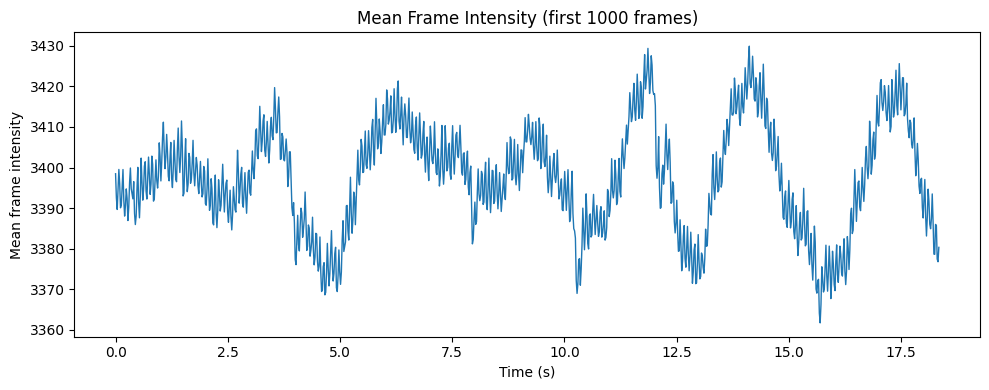

In [5]:
n_plot = min(1000, Movies.data.shape[0])  # safeguard for large files and net access
mean_intensities = [Movies.data[i].mean() for i in range(n_plot)]

plt.figure(figsize=(10, 4))
plt.plot(np.arange(n_plot) / Movies.rate, mean_intensities, lw=1)
plt.xlabel("Time (s)")
plt.ylabel("Mean frame intensity")
plt.title("Mean Frame Intensity (first 1000 frames)")
plt.tight_layout()
plt.show()

## 5. Metadata: Keywords and Experimental Context

In [6]:
# Print available keywords and experimental info
if hasattr(nwb, "keywords"):
    try:
        print("Keywords:", nwb.keywords[:])
    except Exception as e:
        print("Could not load keywords:", str(e))

print("Experiment description:", getattr(nwb, "experiment_description", None))
print("Institution:", getattr(nwb, "institution", None))

if hasattr(nwb, "session_id"):
    print("Session ID:", nwb.session_id)

Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']
Experiment description: Vessel diameter and pulsatility measurement.
Institution: University of Copenhagen
Session ID: F15BC-19102023


## 6. Suggestions for Further Analysis

- **Explore other NWB files** in the Dandiset using the approach shown above.
- Examine different regions of the movie or implement vessel diameter quantification (see Dandiset keywords and publication).
- Analyze other available metadata (subject age, strain, experimental conditions).
- Perform per-pixel or region-of-interest temporal analyses to study vessel pulsatility.
- Integrate your results with external tools or visualize interactively via [NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=draft).

---

## 7. Summary and Caution

This notebook demonstrated how to:
- Access DANDI datasets from the archive and load NWB files efficiently.
- Extract and visualize example imaging data.
- Summarize file metadata for scientific context.

**Caveats:**  
- This notebook is for demonstration only; results have not been verified. Data access over the network can be slow or unreliable.  
- For publication-quality analyses, use this as a starting point, consult the official documentation, and validate your results!